## 窗口的创建和销毁

In [1]:
import cv2

In [10]:
#创建窗口,shift+tab显示函数说明
cv2.namedWindow('window1',cv2.WINDOW_NORMAL)
#改变窗口大小
cv2.resizeWindow('window1',400,300)
#展示窗口
cv2.imshow('window1',0)
#等待按键，0返回按键ASCII码值，其他整数则为等待时间单位ms
key=cv2.waitKey(5000)
if key == ord('q'):
    cv2.destroyAllWindows()

## 读取图片

In [5]:
import matplotlib.pyplot as plt

In [3]:
#默认彩色
mountain = cv2.imread('./mountain.jpg')
mountain

array([[[209, 215, 214],
        [209, 215, 214],
        [208, 214, 213],
        ...,
        [195, 189, 182],
        [195, 189, 182],
        [196, 190, 183]],

       [[210, 216, 215],
        [209, 215, 214],
        [209, 215, 214],
        ...,
        [193, 187, 180],
        [194, 188, 181],
        [196, 190, 183]],

       [[211, 217, 216],
        [211, 217, 216],
        [210, 216, 215],
        ...,
        [191, 185, 178],
        [192, 186, 179],
        [194, 188, 181]],

       ...,

       [[ 42,  76,  52],
        [ 44,  78,  54],
        [ 47,  81,  57],
        ...,
        [ 96, 130, 113],
        [ 94, 128, 111],
        [ 96, 130, 113]],

       [[ 44,  78,  54],
        [ 45,  79,  55],
        [ 45,  79,  55],
        ...,
        [102, 136, 119],
        [101, 135, 118],
        [104, 138, 121]],

       [[ 42,  76,  52],
        [ 48,  82,  58],
        [ 47,  81,  57],
        ...,
        [103, 137, 120],
        [106, 140, 123],
        [105, 139, 122]]

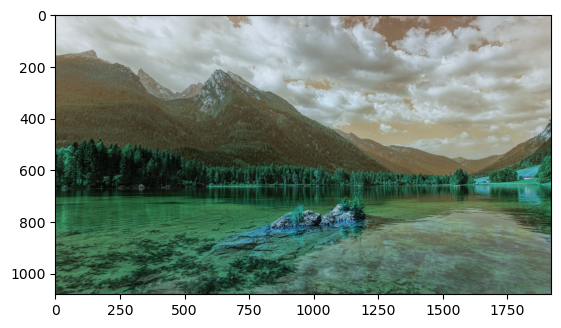

In [6]:
plt.imshow(mountain)
#opencv读入的图片非标准RGB而是BGR因此只有cv2.imshow()才能正常显示

In [8]:
#封装展示窗口的函数
def cv_show(name,img):
    cv2.imshow('name',img)
    key=cv2.waitKey(0)
    if key & 0xFF == ord('q'):
        cv2.destroyAllWindows()

In [12]:
cv_show('mountain',mountain)

## 保存图片

In [ ]:
cv2.imwrite('./1.png',img)

## 视频处理

In [2]:
#视频本质上就是图像流，24帧率或更高
#cv2.VedioCapture()可以捕获摄像头内容，用0，1，2,表示设备
#如果是视频，直接输入路径即可
import cv2

#建立窗口
cv2.namedWindow('cam1',cv2.WINDOW_NORMAL)
cv2.resizeWindow('cam1',400,300)

cap = cv2.VideoCapture(0)
#循环读帧
while True:
    ret , frame=cap.read()
    if not ret:
        break;
    cv2.imshow('cam1',frame)
    key = cv2.waitKey(10)
    if key & 0xFF == ord('q'):
        break;
cap.release()
cv2.destroyAllWindows()

## 视频录制

In [1]:
import cv2
cap=cv2.VideoCapture(0)

fourcc=cv2.VideoWriter_fourcc(*'mp4v')
#*'mp4v'是解包操作，相当于'm''p''4''v'

vw=cv2.VideoWriter('out1.mp4',fourcc,30,(640,480))
# 输出 内容源  帧率  摄像头分辨率

while cap.isOpened():
    ret , frame =cap.read()
    if not ret:
        break
    vw.write(frame)
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) == ord('q'):
        break;

cap.release()
vw.release()
cv2.destroyAllWindows()

## 控制鼠标

In [ ]:
#随用随查吧，没啥技术

## TrackBar控件

In [1]:
import cv2
import numpy as np

cv2.namedWindow('trackbar',cv2.WINDOW_NORMAL)
cv2.resizeWindow('mouse',640,480)

def callback(value):
    print(value)

#创建trackbar
cv2.createTrackbar('R','trackbar',0,255,callback)
cv2.createTrackbar('G','trackbar',0,255,callback)
cv2.createTrackbar('B','trackbar',0,255,callback)

#创建一个背景图片
img=np.zeros((480,640,3),np.uint8)
while True:
    r=cv2.getTrackbarPos('R','trackbar')
    g=cv2.getTrackbarPos('G','trackbar')
    b=cv2.getTrackbarPos('B','trackbar')
    #改变背景图颜色
    img[:]=[b,g,r]
    cv2.imshow('trackbar',img)
    if cv2.waitKey(1)==ord('q'):
        break
cv2.destroyAllWindows()

4
9
14
18
21
23
26
32
35
39
42
44
46
51
56
60
62
2
11
16
19
23
28
30
33
35
39
42
47
49
53
55
56
58
60
62
63
65
69
72
74
76
79
81
83
84
86
88
91
98
100
4
7
11
14
18
23
30
37
44
49
53
56
60
65
67
70
74
77
79
83
84
88
93
97
100
104
107
111
113
114
116
120
121
123
128
130
132
134
137
141
146
149
153
157
63
67
70
74
79
83
86
91
98
106
109
116
118
120
121
123
125
128
132
134
137
141
144
148
144
148
155
162
165
169
172
178
183
188
193
197
208
215
222
230
234
239
98
100
102
106
109
116
120
123
127
128
130
132
135
137
141
149
157
165
172
178
181
190
202
209
215
218
220
223
225
227
230
232
236
239
243
248
251
255
158
160
164
167
174
181
192
204
236
251
255
251
244
237
222
208
192
188
186
185
181
179
176
172
169
165
164
160
157
151
148
139
134
120
100
79
69
56
47
37
30
25
21
16
14
11
7
9
14
25
35
70
106
142
183
204
234
255
237
236
232
223
216
206
195
172
157
148
139
111
93
74
53
40
30
23
18
253
251
250
244
241
239
236
229
222
209
172
135
106
102
95
93
91
88
81
77
76
72
63
56
51
49
47
44
37
30
26
